# Exploratory Data Analysis - Daily Bike Sharing Dataset
## Comprehensive Analysis of Daily Rental Patterns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

In [2]:
# Load the daily dataset
df = pd.read_csv(r'C:\Users\P.SUDHAKAR BABU\OneDrive\Desktop\springboard\day.csv')
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
df.head()

Dataset Shape: 731 rows × 16 columns


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
# Statistical summary
df.describe().round(2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731.00,731.0,731.00,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,2.50,0.5,6.52,0.03,3.0,0.68,1.40,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,1.11,0.5,3.45,0.17,2.0,0.47,0.54,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,1.00,0.0,1.00,0.00,0.0,0.00,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,2.00,0.0,4.00,0.00,1.0,0.00,1.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,3.00,1.0,7.00,0.00,3.0,1.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,3.00,1.0,10.00,0.00,5.0,1.00,2.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,4.00,1.0,12.00,1.00,6.0,1.00,3.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


In [5]:
# Missing values analysis
missing = df.isnull().sum()
print("Missing Values:")
print(missing[missing > 0] if missing.sum() > 0 else "No missing values detected")

Missing Values:
No missing values detected


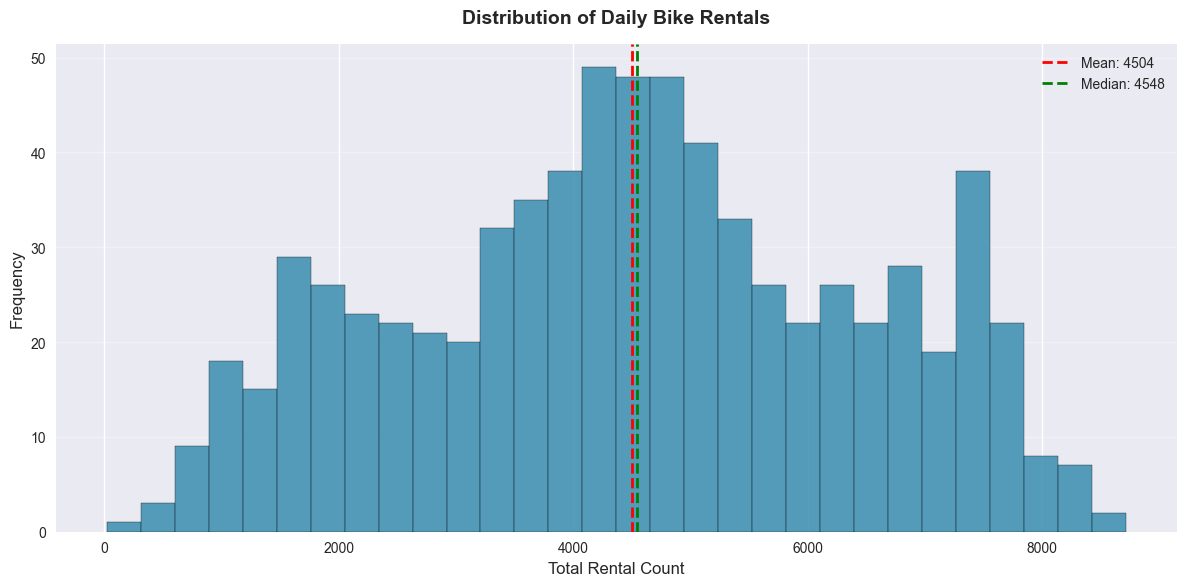

In [6]:
# Distribution of total bike rentals
plt.figure(figsize=(12, 6))
plt.hist(df['cnt'], bins=30, color='#2E86AB', alpha=0.8, edgecolor='black')
plt.axvline(df['cnt'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["cnt"].mean():.0f}')
plt.axvline(df['cnt'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["cnt"].median():.0f}')
plt.title('Distribution of Daily Bike Rentals', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Total Rental Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

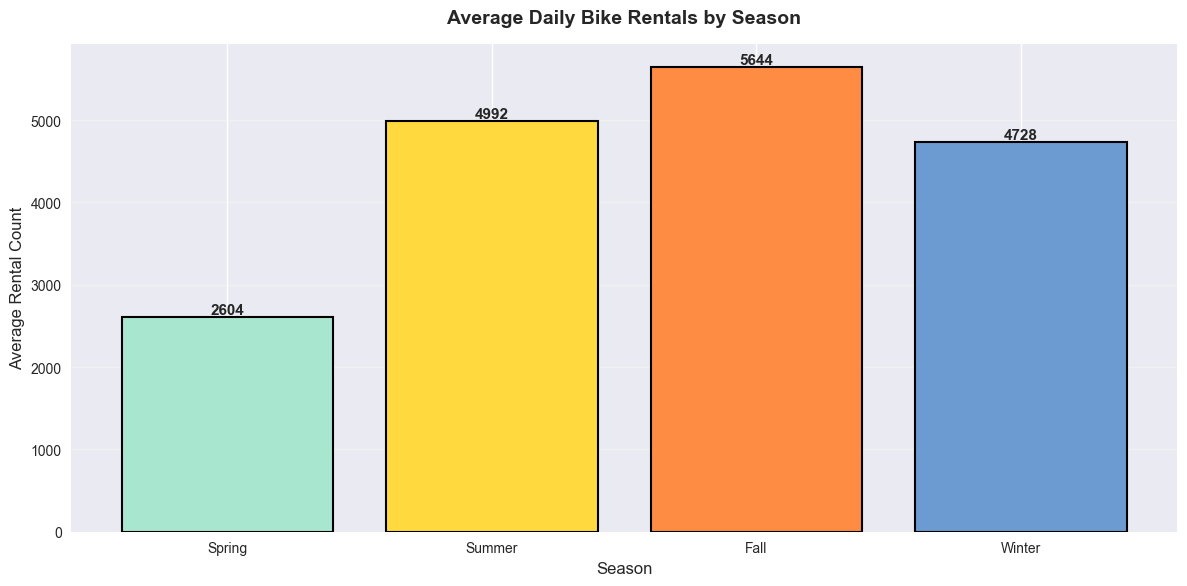

In [7]:
# Seasonal analysis
plt.figure(figsize=(12, 6))
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_name'] = df['season'].map(season_map)
season_data = df.groupby('season_name')['cnt'].mean().reindex(['Spring', 'Summer', 'Fall', 'Winter'])
colors = ['#A8E6CF', '#FFD93D', '#FF8C42', '#6C9BD1']
bars = plt.bar(season_data.index, season_data.values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Average Daily Bike Rentals by Season', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Rental Count', fontsize=12)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

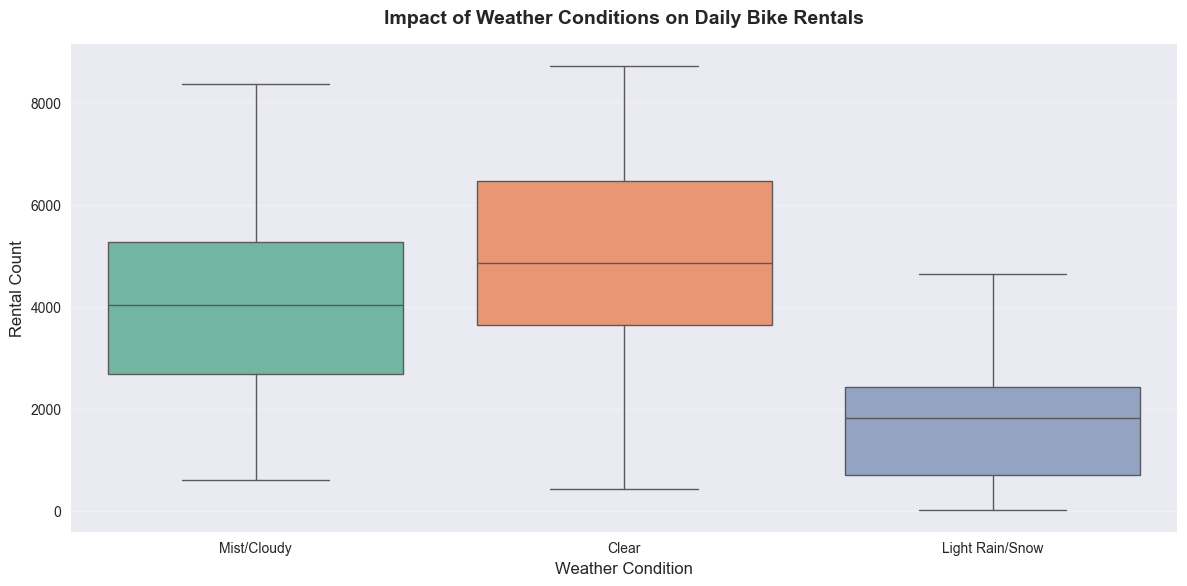

In [8]:
# Weather situation impact
plt.figure(figsize=(12, 6))
weather_map = {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
df['weather_name'] = df['weathersit'].map(weather_map)
sns.boxplot(data=df, x='weather_name', y='cnt', palette='Set2')
plt.title('Impact of Weather Conditions on Daily Bike Rentals', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Rental Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

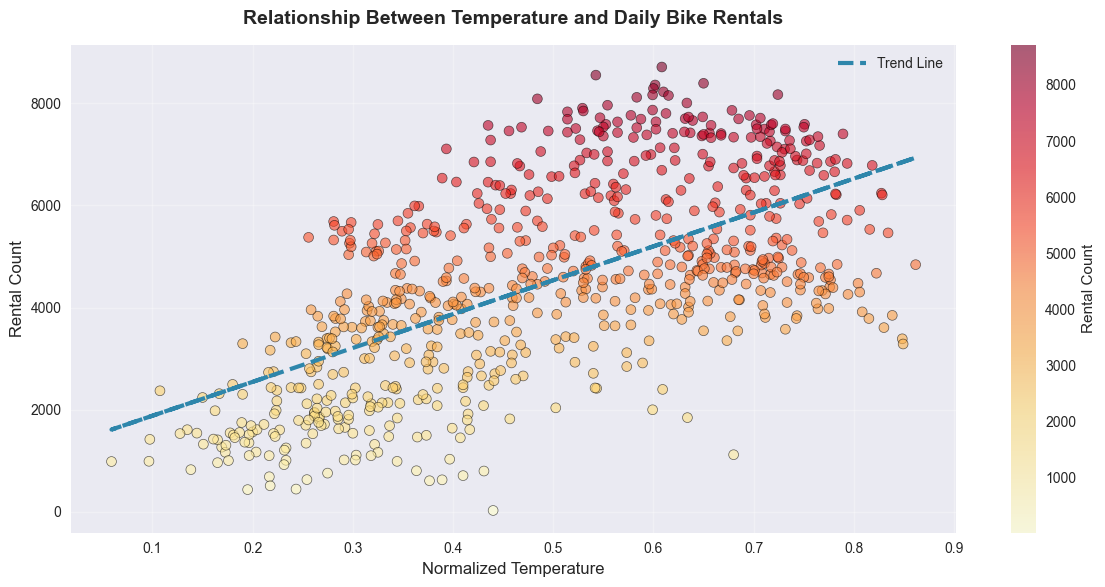

In [9]:
# Temperature correlation
plt.figure(figsize=(12, 6))
plt.scatter(df['temp'], df['cnt'], alpha=0.6, c=df['cnt'], cmap='YlOrRd', s=50, edgecolors='black', linewidth=0.5)
z = np.polyfit(df['temp'], df['cnt'], 1)
p = np.poly1d(z)
plt.plot(df['temp'], p(df['temp']), "--", color='#2E86AB', linewidth=3, label=f'Trend Line')
plt.colorbar(label='Rental Count')
plt.title('Relationship Between Temperature and Daily Bike Rentals', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Normalized Temperature', fontsize=12)
plt.ylabel('Rental Count', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

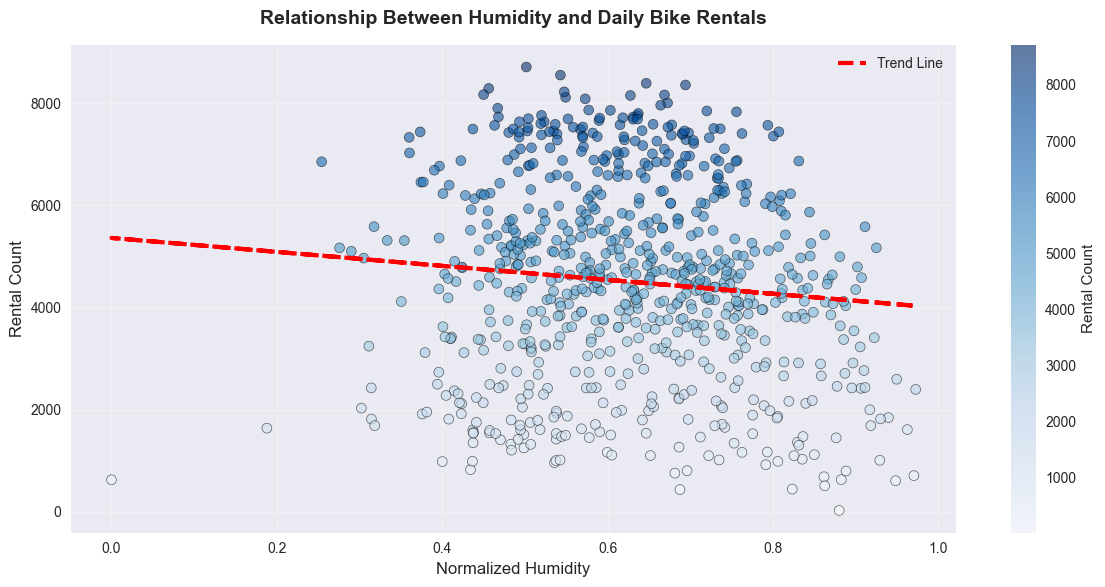

In [10]:
# Humidity impact
plt.figure(figsize=(12, 6))
plt.scatter(df['hum'], df['cnt'], alpha=0.6, c=df['cnt'], cmap='Blues', s=50, edgecolors='black', linewidth=0.5)
z = np.polyfit(df['hum'], df['cnt'], 1)
p = np.poly1d(z)
plt.plot(df['hum'], p(df['hum']), "--", color='red', linewidth=3, label='Trend Line')
plt.colorbar(label='Rental Count')
plt.title('Relationship Between Humidity and Daily Bike Rentals', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Normalized Humidity', fontsize=12)
plt.ylabel('Rental Count', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

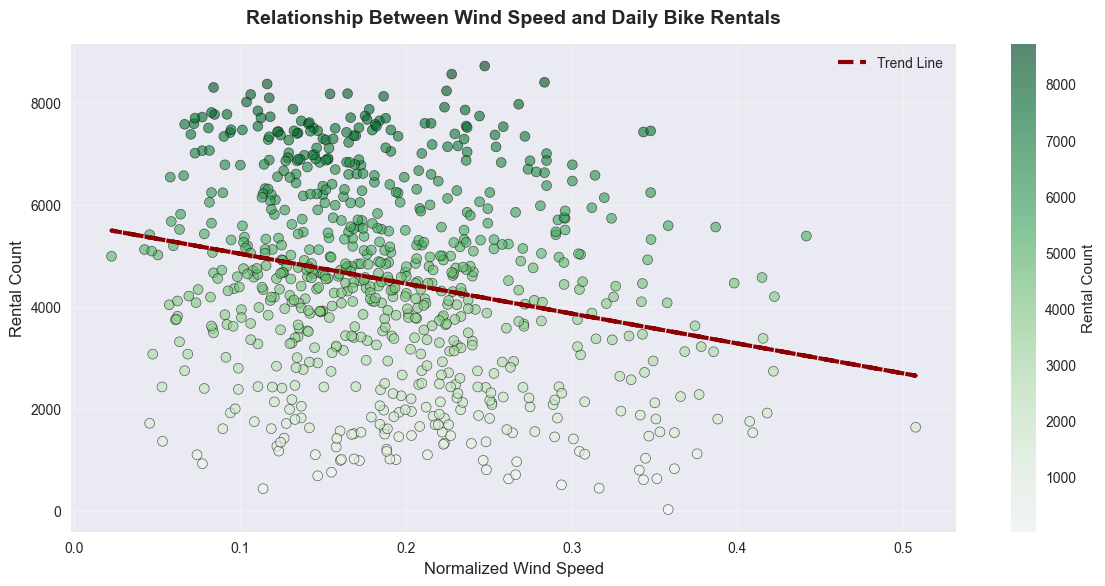

In [11]:
# Wind speed analysis
plt.figure(figsize=(12, 6))
plt.scatter(df['windspeed'], df['cnt'], alpha=0.6, c=df['cnt'], cmap='Greens', s=50, edgecolors='black', linewidth=0.5)
z = np.polyfit(df['windspeed'], df['cnt'], 1)
p = np.poly1d(z)
plt.plot(df['windspeed'], p(df['windspeed']), "--", color='darkred', linewidth=3, label='Trend Line')
plt.colorbar(label='Rental Count')
plt.title('Relationship Between Wind Speed and Daily Bike Rentals', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Normalized Wind Speed', fontsize=12)
plt.ylabel('Rental Count', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

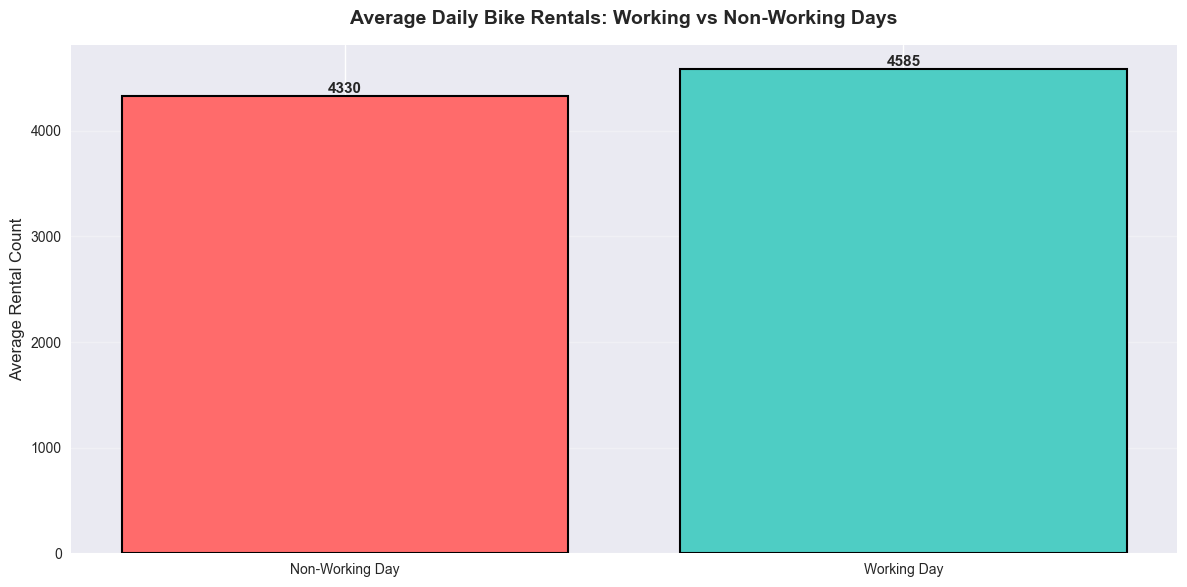

In [12]:
# Working day vs non-working day
plt.figure(figsize=(12, 6))
workday_data = df.groupby('workingday')['cnt'].mean()
labels = ['Non-Working Day', 'Working Day']
colors = ['#FF6B6B', '#4ECDC4']
bars = plt.bar(labels, workday_data.values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Average Daily Bike Rentals: Working vs Non-Working Days', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Average Rental Count', fontsize=12)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

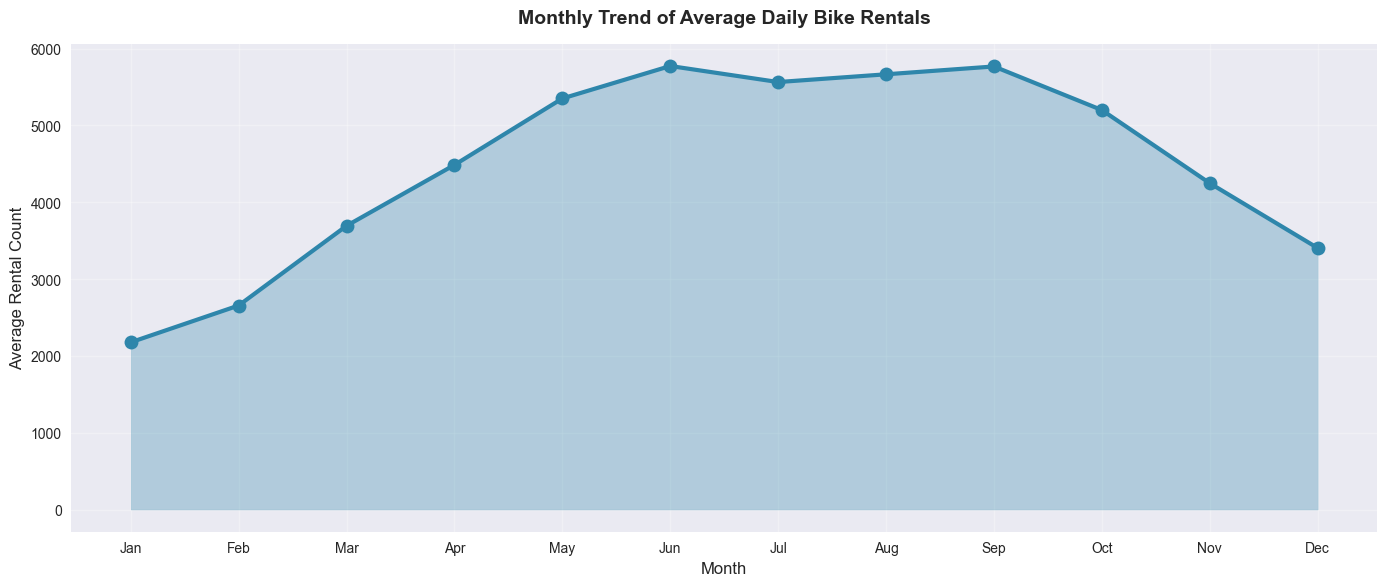

In [13]:
# Monthly trend analysis
plt.figure(figsize=(14, 6))
monthly_avg = df.groupby('mnth')['cnt'].mean()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, monthly_avg.values, marker='o', linewidth=3, markersize=10, color='#2E86AB')
plt.fill_between(range(12), monthly_avg.values, alpha=0.3, color='#2E86AB')
plt.title('Monthly Trend of Average Daily Bike Rentals', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Rental Count', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

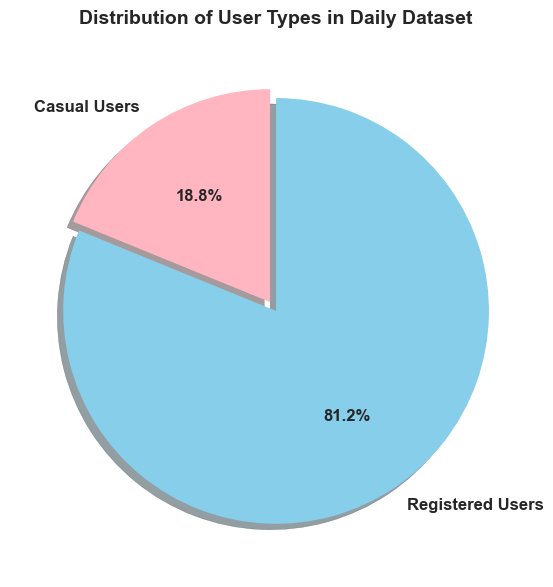

In [14]:
# User type distribution
plt.figure(figsize=(12, 6))
user_totals = [df['casual'].sum(), df['registered'].sum()]
labels = ['Casual Users', 'Registered Users']
colors = ['#FFB6C1', '#87CEEB']
explode = (0.05, 0)
plt.pie(user_totals, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, 
        explode=explode, shadow=True, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Distribution of User Types in Daily Dataset', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

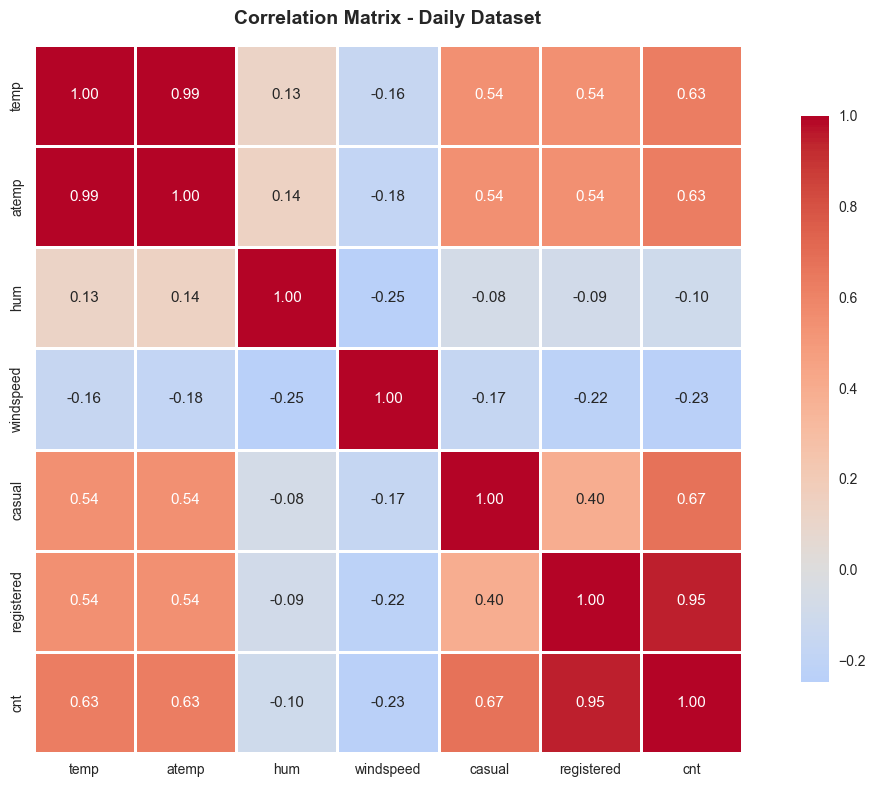

In [15]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
corr_matrix = df[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix - Daily Dataset', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

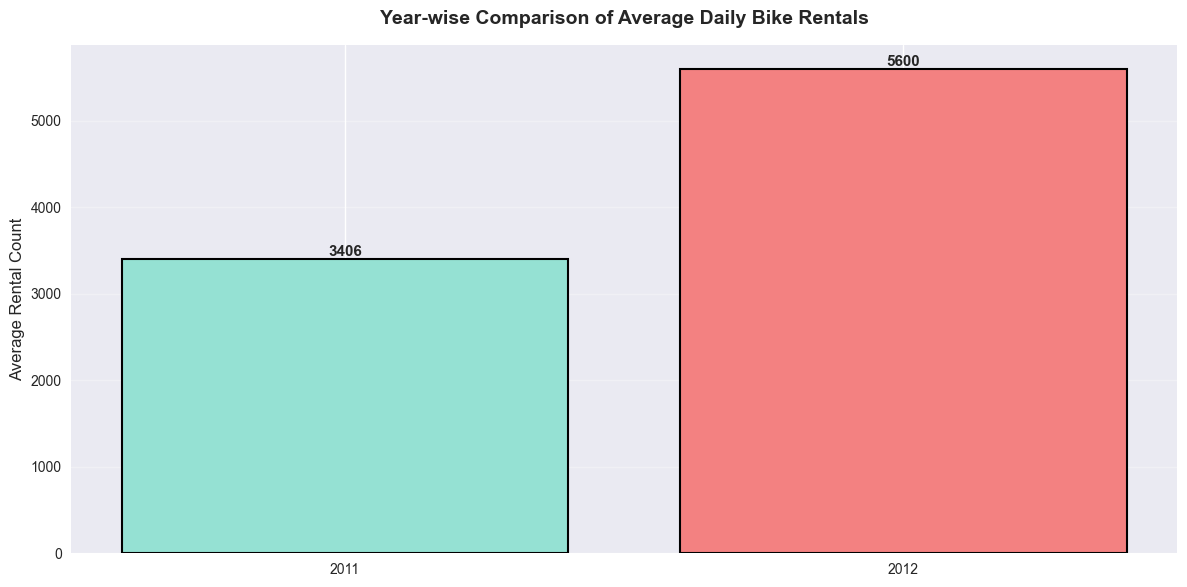

In [16]:
# Year-wise comparison
plt.figure(figsize=(12, 6))
year_data = df.groupby('yr')['cnt'].mean()
years = ['2011', '2012']
colors = ['#95E1D3', '#F38181']
bars = plt.bar(years, year_data.values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Year-wise Comparison of Average Daily Bike Rentals', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Average Rental Count', fontsize=12)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Key Findings - Daily Dataset Analysis

### 1. Seasonal Patterns
- Fall season demonstrates the highest average daily rentals, followed by Summer
- Winter season shows the lowest rental activity
- Clear seasonal variation indicates strong weather dependency

### 2. Weather Impact
- Clear weather conditions result in significantly higher rental counts
- Adverse weather (rain/snow) substantially reduces bike usage
- Weather is a critical factor in rental demand forecasting

### 3. Environmental Factors
- Strong positive correlation between temperature and rental count (r ≈ 0.63)
- Negative correlation with humidity and wind speed
- Optimal conditions: moderate temperature, low humidity, minimal wind

### 4. Temporal Patterns
- Working days show higher average rentals compared to holidays/weekends
- Peak rental months: June through September
- Significant year-over-year growth observed (2011 to 2012)

### 5. User Demographics
- Registered users constitute approximately 81% of total rentals
- Casual users represent 19% of the user base
- Registered users show more consistent usage patterns

### 6. Statistical Insights
- Mean daily rentals: ~4,500 bikes
- Distribution shows slight right skew
- No missing values detected in the dataset
- Strong correlation between actual and felt temperature (r ≈ 0.99)